In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/drbha/Downloads/archive (27)/creditcard_2023.csv")

In [4]:
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\drbha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


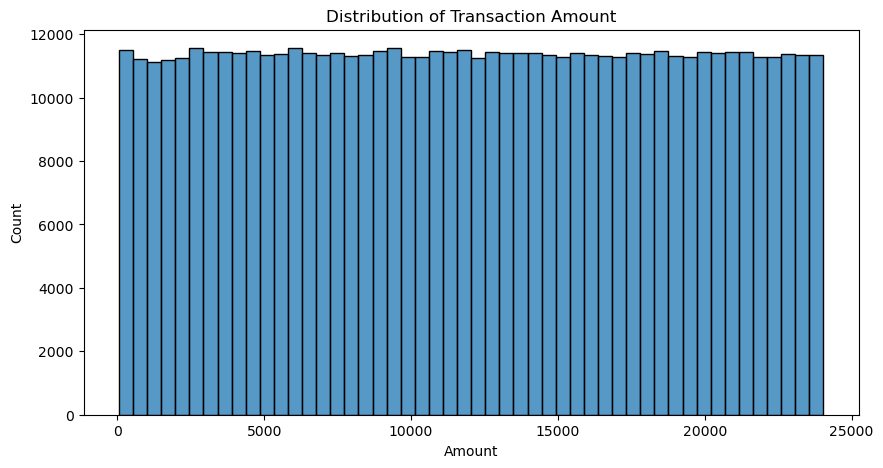

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins= 50)
plt.title('Distribution of Transaction Amount')
plt.show()

In [9]:
import numpy as np
# Outlier detection Using IQR
Q1 = np.percentile(df['Amount'], 25)
Q3 = np.percentile(df['Amount'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['Amount']< lower_bound) | (df['Amount'] > upper_bound)]
print(outliers)
print(f"Outliers detected: {len(outliers)}")

Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
Outliers detected: 0


In [10]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df['Amount'])
threshold = 3
outliers = df[np.abs(z_scores) > threshold]
print(f"Outliers detected using Z-scores: {len(outliers)}")


Outliers detected using Z-scores: 0


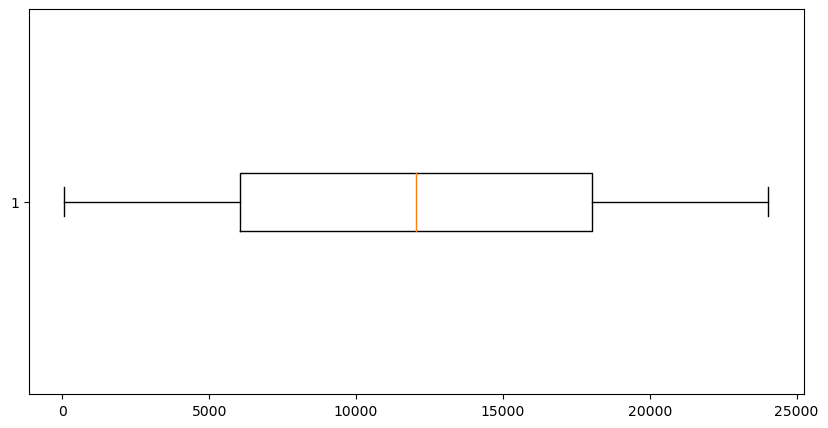

In [11]:
# As there are no outliers, let's make sure by visualizing using boxplot
plt.figure(figsize= (10,5))
plt.boxplot(df['Amount'], vert = False)
plt.show()

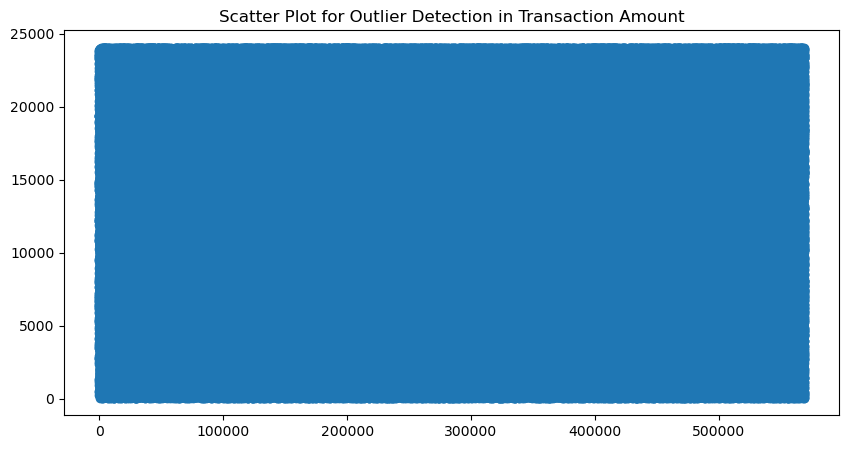

In [12]:
plt.figure(figsize= (10,5))
plt.scatter(range(len(df)), df['Amount'])
plt.title('Scatter Plot for Outlier Detection in Transaction Amount')
plt.show()

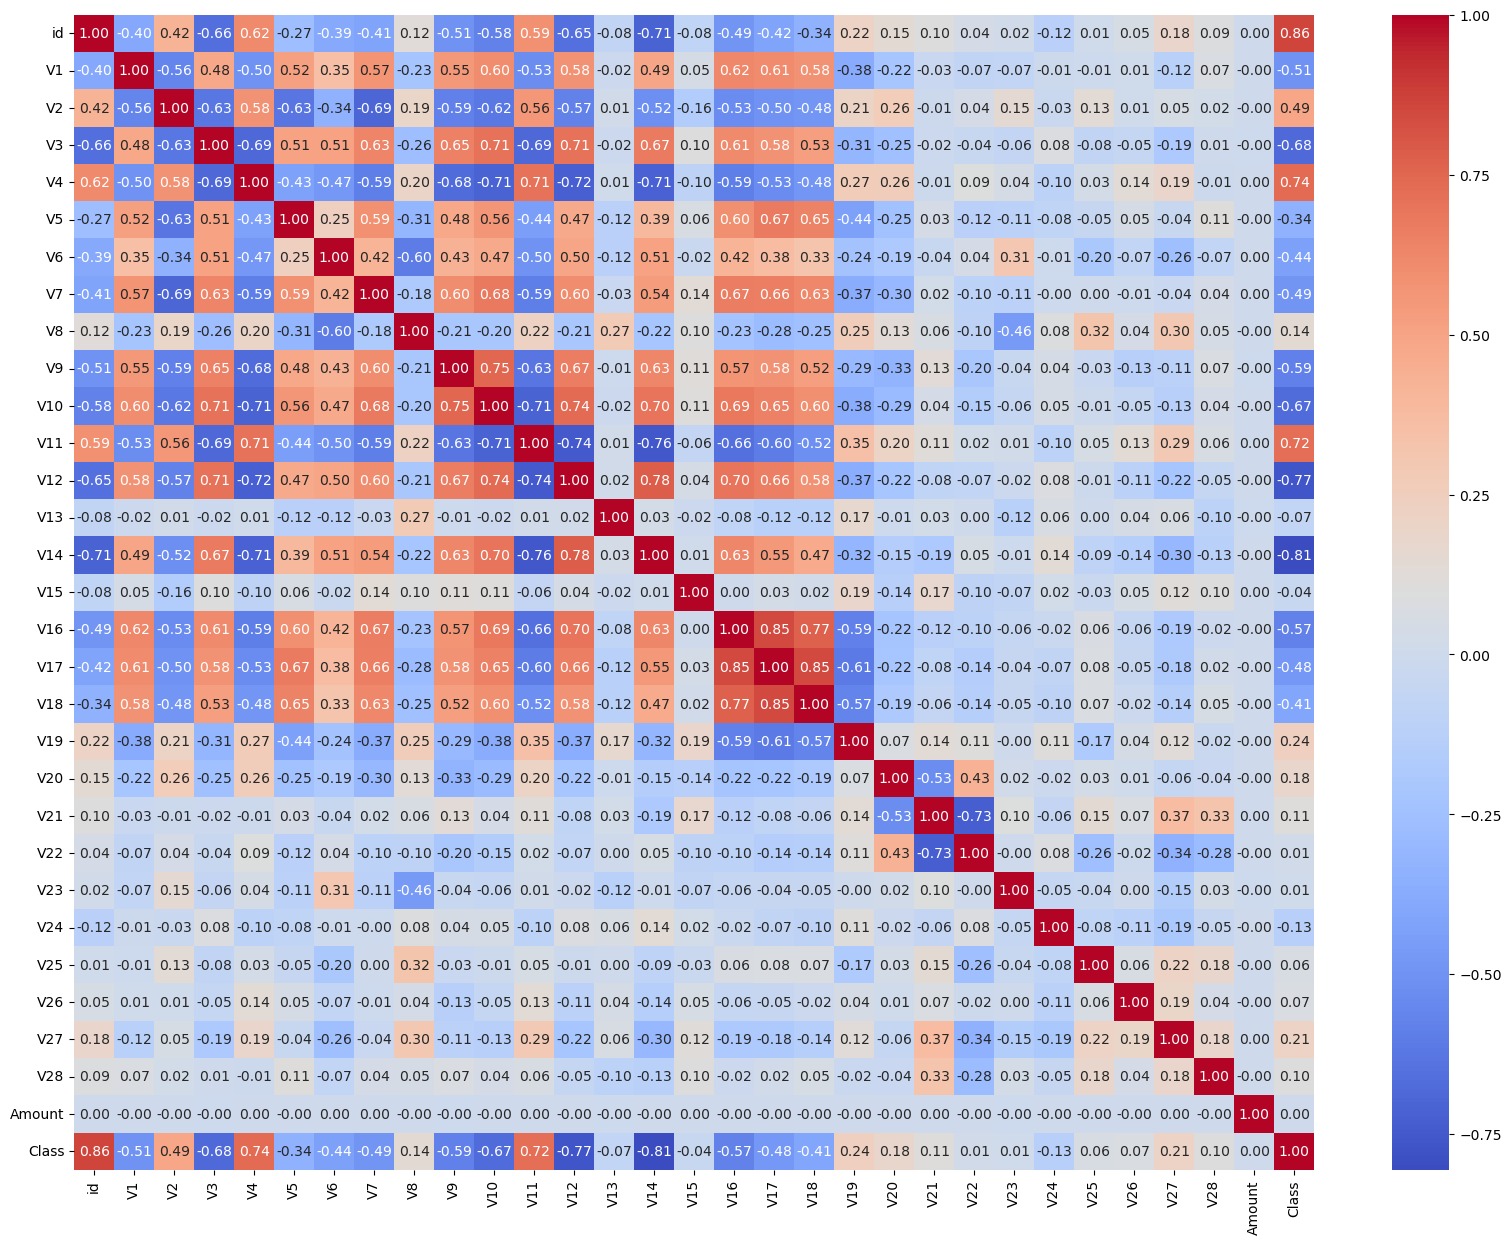

In [13]:
#correlation matrix
corr = df.corr()

plt.figure(figsize= (20,15))
sns.heatmap(corr, annot= True, fmt= '.2f', cmap= 'coolwarm')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [16]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Scaled_Amount'],
      dtype='object')

In [17]:
df.drop(columns= ['Amount'])

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0,0.858447
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0,-0.796369
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0,-1.377011
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0,-0.962119
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0,0.323285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,1,-1.105231
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,1,-1.067766
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1,1.666401
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,1,-0.271853


In [18]:
from sklearn.ensemble import IsolationForest

# Define features for anomaly detection
features = df[['V3','V4','V9','V10', 'V11', 'V12', 'V14', 'V17', 'V16']]


In [19]:
# Train Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(features)

# Identify anomalies
anomalies = df[df['anomaly_score'] == -1]
print(f"Anomalies detected: {len(anomalies)}")

Anomalies detected: 5669


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data
X = df[['V3','V4','V9','V10', 'V11', 'V12', 'V14', 'V17', 'V16']]
y = df['Class']



In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict and evaluate
rf_predictions = rf_clf.predict(X_test)
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

[[85075    74]
 [    6 85434]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.99883052 0.99978897 0.99896242 0.99963069 0.99957793]
Mean cross-validation score: 0.9993581063257302


In [ ]:
# These cross-validation scores are incredibly high and consistent, with a mean score of 0.999. This suggests that your Random Forest model is performing exceptionally well across all folds, indicating it's not just memorizing the training data but generalizing very well.

# Key Takeaways:
# High Consistency: The high and consistent scores across all folds show robustness.

# Mean Score: A mean score of 0.999 is outstanding and confirms the model's accuracy.

Text(0.5, 1.0, 'Feature Importance')

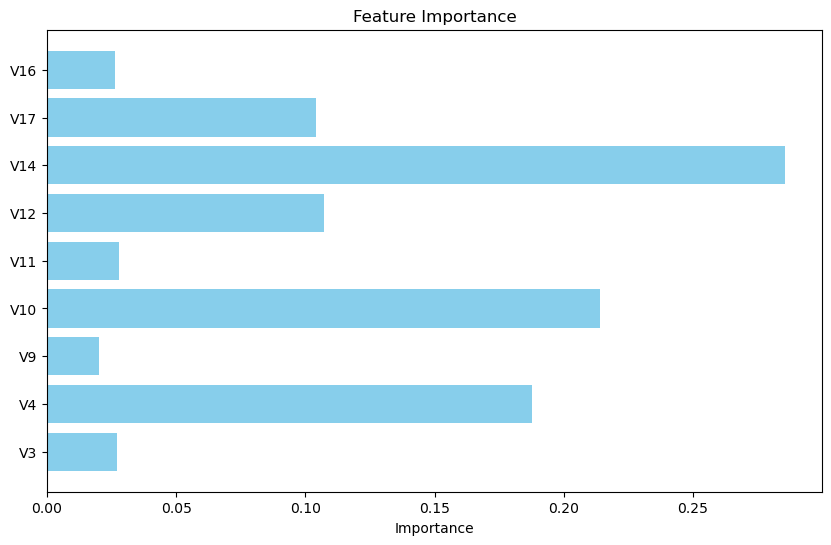

In [29]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
importances = rf_clf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')

In [25]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_predictions = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))


[[83318  1831]
 [ 5116 80324]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85149
           1       0.98      0.94      0.96     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [ ]:
# True Negatives (TN): 83,318 transactions correctly identified as not fraud.

# False Positives (FP): 1,831 transactions incorrectly identified as fraud.

# False Negatives (FN): 5,116 transactions incorrectly identified as not fraud.

# True Positives (TP): 80,324 transactions correctly identified as fraud.

# Classification Report:
# Precision: The accuracy of the positive predictions.

# Class 0 (Not Fraud): 0.94

# Class 1 (Fraud): 0.98

# Recall: The ability to find all relevant cases within a dataset.

# Class 0: 0.98

# Class 1: 0.94

# F1-Score: The harmonic mean of precision and recall.

# Class 0: 0.96

# Class 1: 0.96

# Support: The number of true instances for each class.

# Class 0: 85,149

# Class 1: 85,440

# Accuracy:
# Overall accuracy: 0.96 (96%), meaning the model correctly classified 96% of the transactions.

# Macro Avg and Weighted Avg:
# Both metrics are 0.96 for precision, recall, and F1-score, reflecting strong performance across both classes.

# Inference:
# High Precision for Fraud Detection: The model is very accurate in its positive predictions, meaning it’s good at predicting which transactions are fraudulent.

# High Recall for Non-Fraudulent Transactions: The model is very effective at identifying non-fraudulent transactions.

# Balanced Performance: Both classes have a high F1-score, indicating balanced performance.

# Overall, your model is doing an excellent job at detecting fraudulent transactions while maintaining high accuracy across the board. The slight drop from perfect scores suggests that the model is generalizing well and not overfitting.

In [26]:
# Averaging predictions from both models
combined_predictions = (rf_predictions + lr_predictions) / 2
combined_predictions = (combined_predictions >= 0.5).astype(int)

# Evaluate combined model
print(confusion_matrix(y_test, combined_predictions))
print(classification_report(y_test, combined_predictions))


[[83299  1850]
 [    6 85434]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85149
           1       0.98      1.00      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



In [ ]:
# # Improved Accuracy: By combining predictions, you can reduce the likelihood of errors 
# that any single model might make. If one model misses a fraud, the other might catch it, 
# leading to better overall performance.

# # Robustness: Combining models can make your prediction system more robust and reliable 
# by mitigating the biases or limitations inherent in any one model.

# # Balanced Performance: Averaging helps balance precision and recall, providing a more 
# stable prediction system.

# # This ensemble approach enhances the robustness of your fraud detection system, ensuring 
# a higher level of accuracy and reliability.